# Song Popularity Analysis

---


**Group-3**

---


- Sujal Rajesh Machhale	22b0001
- Nikhil Jha	22b0002
- Anuttar Jain	22b0003
- Shrivardhan Nandkumar Kondekar	22b0054
- Palak Jain	22b0055
- Devesh Mittal	22b0070

---

video link - 

---

Link to dataset - 'https://github.com/Anuttar7/AE248_Project/raw/main/Dataset_Test.csv'



### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson, dweibull, t,ttest_ind
import statsmodels.api as sm
import seaborn as sns

# using to eliminate the future warnings shown by the IDE during code running
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

url = 'https://github.com/Anuttar7/AE248_Project/raw/main/Dataset_Test.csv'
df = pd.read_csv(url)

display(df)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### Data Cleaning

We tried first with the train dataset. but found out that even replacing the nan values with the respective colums median, mean, or mode, still the accuracy of the mlr model didnt change significantly. 

Hence we went with the test data set. which had a much cleaner data set, and workable too.

In [2]:
df = df.dropna()
df.drop_duplicates(inplace = True)
df.reset_index(drop=True, inplace=True)
display(df)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
14922,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
14923,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
14924,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### Plotting pdf of all variables

First standardizing the coloumns of the data

In [3]:
# Separate numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Function to perform z-score normalization
def z_score_normalize(df, cols):
    return (df[cols] - df[cols].mean()) / df[cols].std()

# Apply z-score normalization to numerical columns
normalized_df = df.copy()
normalized_df[numerical_cols] = z_score_normalize(df, numerical_cols)

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


1


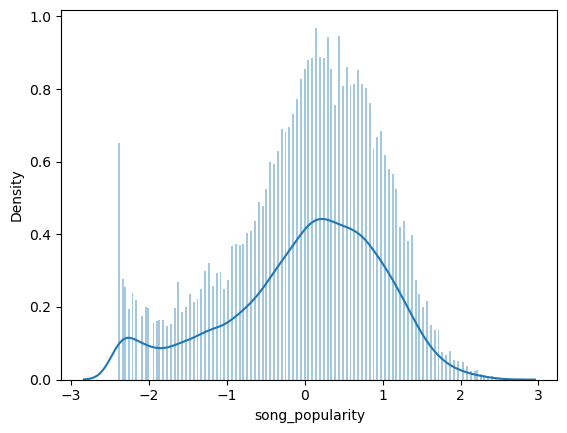

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


2


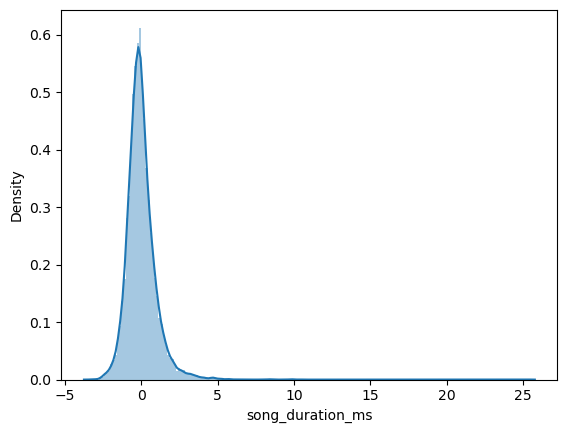

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


3


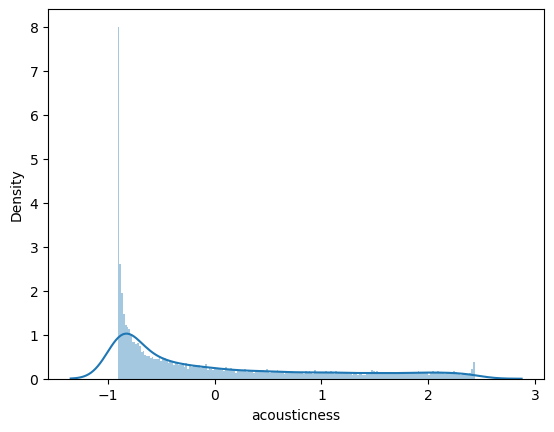

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


4


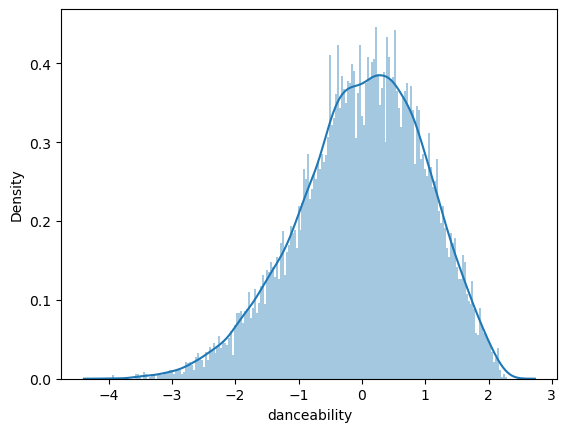

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


5


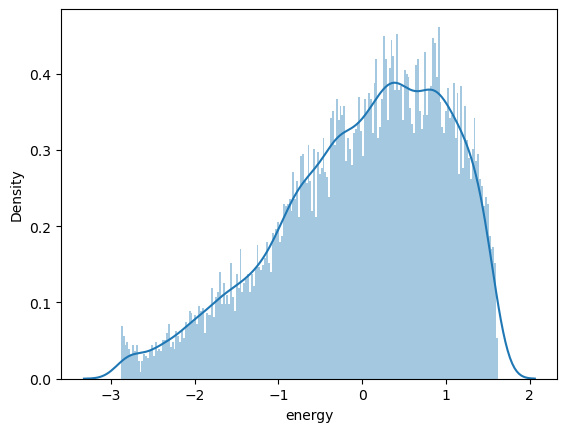

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


6


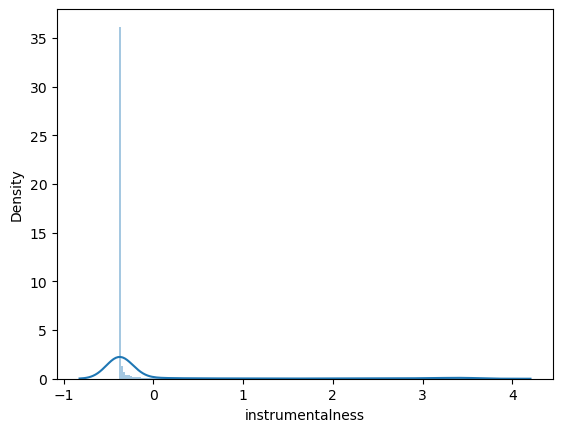

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


7


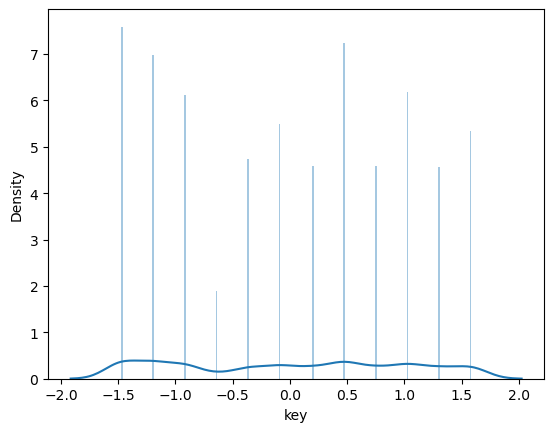

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


8


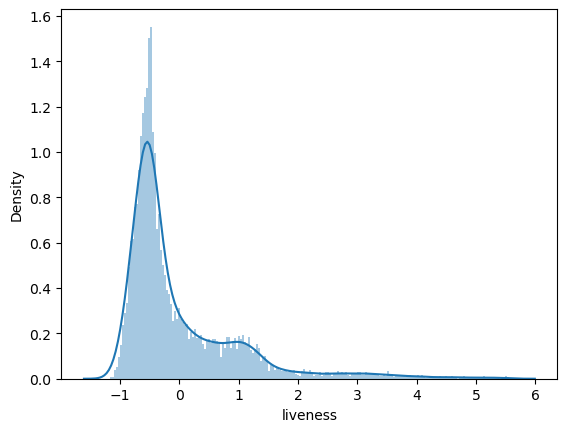

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


9


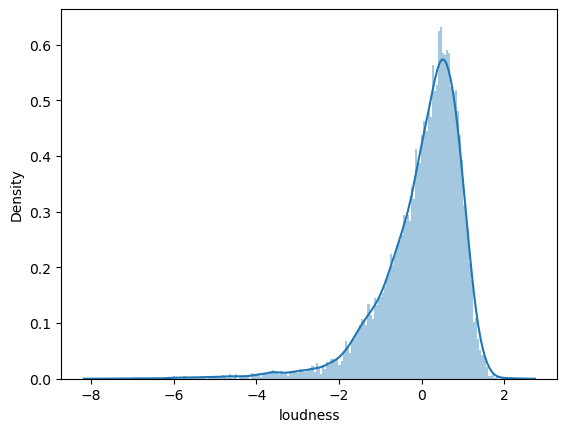

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


10


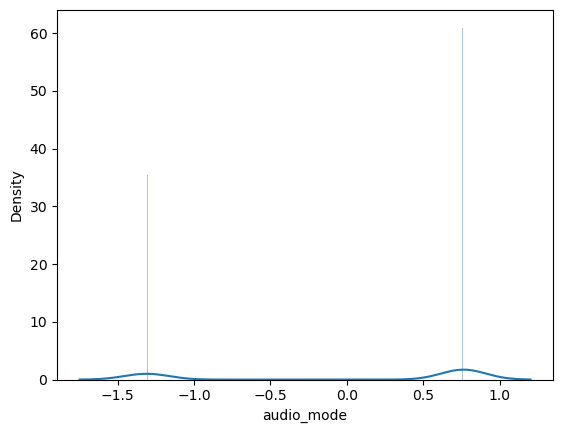

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


11


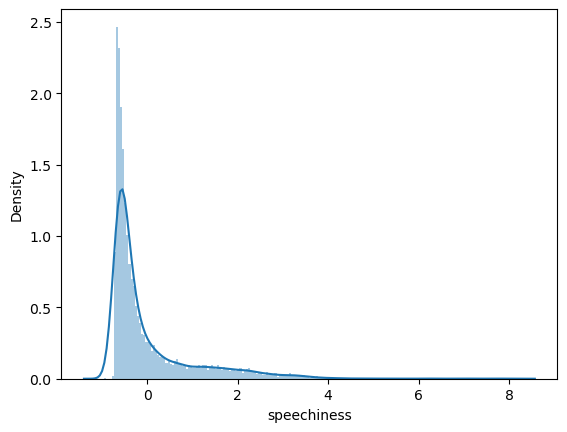

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


12


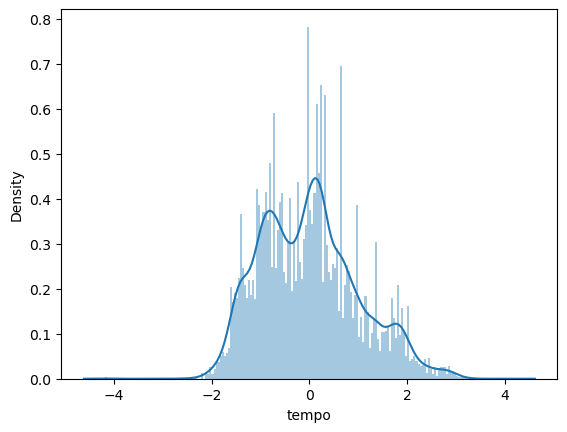

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


13


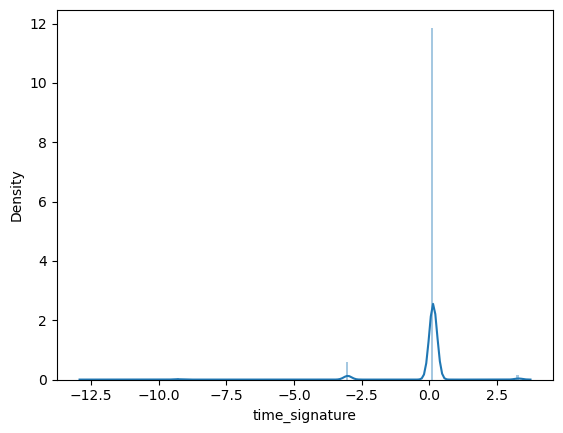

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\555481447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dff, bins=200)


14


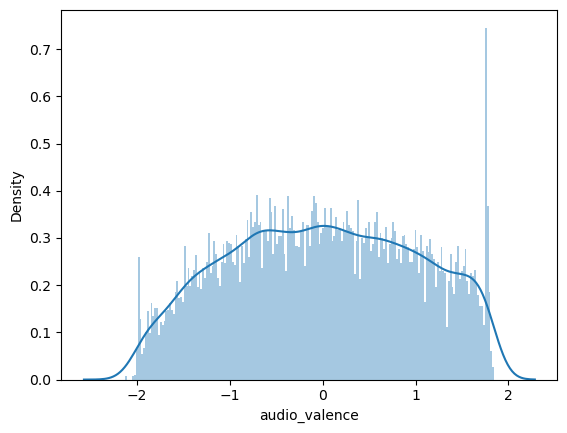

In [4]:
for i in range(1, 15):
    dff = normalized_df.iloc[:,i]
    ax = sns.distplot(dff, bins=200)
    #ax = sns.histplot(dff, bins=200, , element='density', kde=True)
    print(i)
    plt.show()


As can be seen, there are some discrete random variables, with very less outputs, and majority are continuous

### Trying to fit a standard/known distribution on one of the standard variables of the dataset, i.e song duration

0.999999999999996


C:\Users\HP\AppData\Local\Temp\ipykernel_13772\2572930827.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(a, bins=200, kde=True)


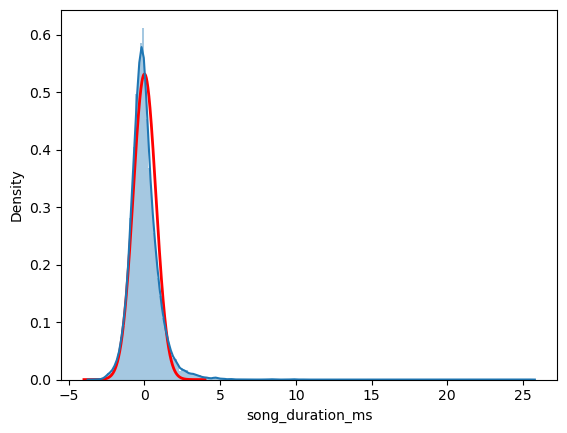

In [5]:
M = df['song_duration_ms'].mean()
S = df['song_duration_ms'].std()
mean = []
a = df['song_duration_ms']
a = (a-M)/S

print(a.std())
x = np.linspace(-4,4,1000)
std = 0.75
pdf = (1 / (std*np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x)/std)**2)
plt.plot(x, pdf, 'r', linewidth=2)

ax = sns.distplot(a, bins=200, kde=True)

As shown above, the standard normal fits fairly well to the standardized song duration variable.

### **Hypothesis Testing**
**Null Hypothesis (H0)**: There is no significant difference in the mean popularity score between short (<= mean duration) and long (> mean duration) songs.

**Alternative Hypothesis (H1)**: There is a significant difference in the mean popularity score between short and long songs.

As we have proved earlier, the song duration random variable is normally distributed, and the difference in means of the song duration for popular and unpopular too is students t-distribution.

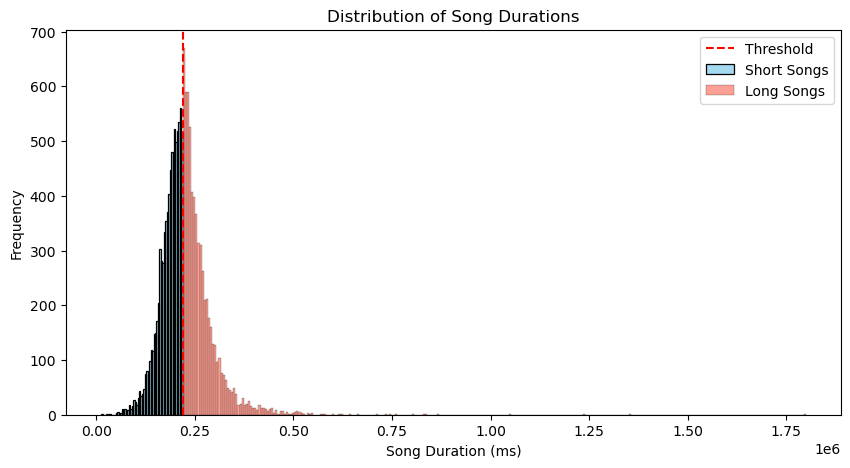

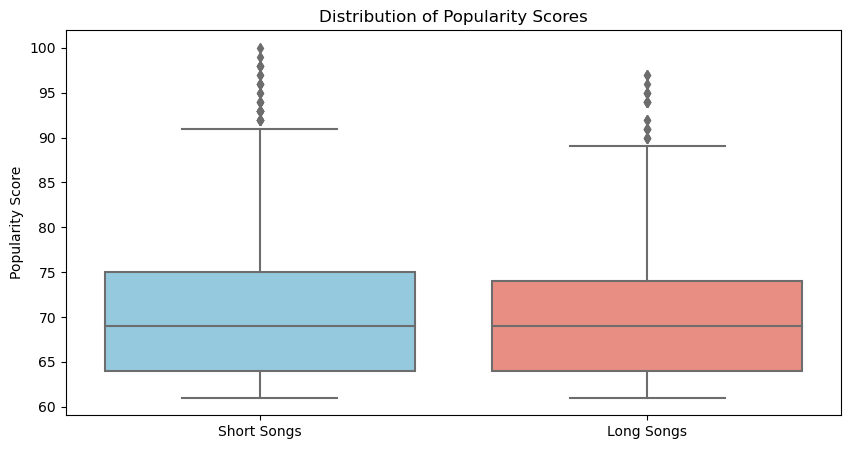

Results of Hypothesis Testing:
Null hypothesis is accepted as data is consistent with the hypothesis. There is no significant difference in popularity scores between short and long songs.

Mean Popularity Score for Short Songs: 70.17386231038506
Mean Popularity Score for Long Songs: 70.02562862669245

p-value: 0.4851519268319606


In [6]:

# Calculate threshold as the mean of song durations
threshold_duration = df['song_duration_ms'].mean()

# Partition the data into short and long songs
short_songs = df[df['song_duration_ms'] <= threshold_duration]
long_songs = df[df['song_duration_ms'] > threshold_duration]

# Calculate mean popularity scores for short and long songs
mean_popularity_short = short_songs[short_songs['song_popularity'] > 60]['song_popularity'].mean()
mean_popularity_long = long_songs[long_songs['song_popularity'] > 60]['song_popularity'].mean()

# Perform two-sample t-test
t_stat, p_value = ttest_ind(short_songs[short_songs['song_popularity'] > 60]['song_popularity'],
                             long_songs[long_songs['song_popularity'] > 60]['song_popularity'])

# Set significance level
alpha = 0.05

# Visualize distribution of song durations for short and long songs
plt.figure(figsize=(10, 5))
sns.histplot(data=short_songs, x='song_duration_ms', color='skyblue', label='Short Songs')
sns.histplot(data=long_songs, x='song_duration_ms', color='salmon', label='Long Songs')
plt.axvline(x=threshold_duration, color='red', linestyle='--', label='Threshold')
plt.title('Distribution of Song Durations')
plt.xlabel('Song Duration (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize distribution of popularity scores for short and long songs
plt.figure(figsize=(10, 5))
sns.boxplot(data=[short_songs[short_songs['song_popularity'] > 60]['song_popularity'],
                  long_songs[long_songs['song_popularity'] > 60]['song_popularity']],
            palette=['skyblue', 'salmon'])
plt.title('Distribution of Popularity Scores')
plt.ylabel('Popularity Score')
plt.xticks([0, 1], ['Short Songs', 'Long Songs'])
plt.show()

# Interpret results
print("Results of Hypothesis Testing:")
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in popularity scores between short and long songs.")
else:
    print("Null hypothesis is accepted as data is consistent with the hypothesis. There is no significant difference in popularity scores between short and long songs.")

print(f"\nMean Popularity Score for Short Songs: {mean_popularity_short}")
print(f"Mean Popularity Score for Long Songs: {mean_popularity_long}")
print(f"\np-value: {p_value}")



### **Studying relationship between energy and loudness**

Seeing a correlation matrix heat map to see whether any variables/ outcomes are really related to each other or not

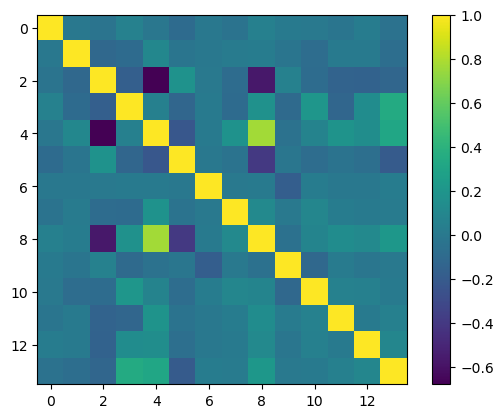

In [7]:
correlation = df.select_dtypes(include=['number']).corr()
plt.imshow(correlation, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

It can be seen that there is slightly strong linear correlation between 4th and 8th variables which are energy and loudness respectively.

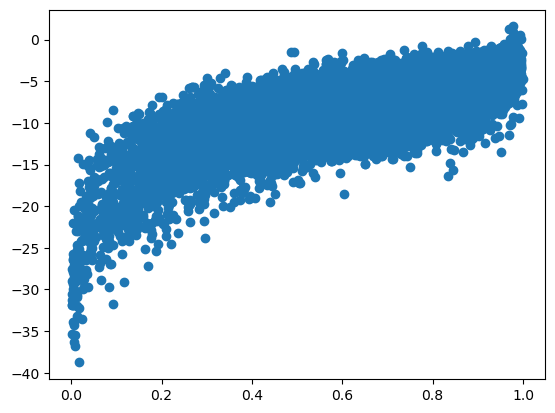

In [8]:
plt.scatter(df['energy'], df['loudness'])

Upon visualizing the scatter plot, it can be seen that although the two variables might be linearly related but a cubic polynomial seems to be a better fit. Hence, we run polynomial regression and compare it the results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     9815.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        18:22:27   Log-Likelihood:                -13047.
No. Observations:               14926   AIC:                         2.610e+04
Df Residuals:                   14922   BIC:                         2.613e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1256      0.007     18.680      0.0

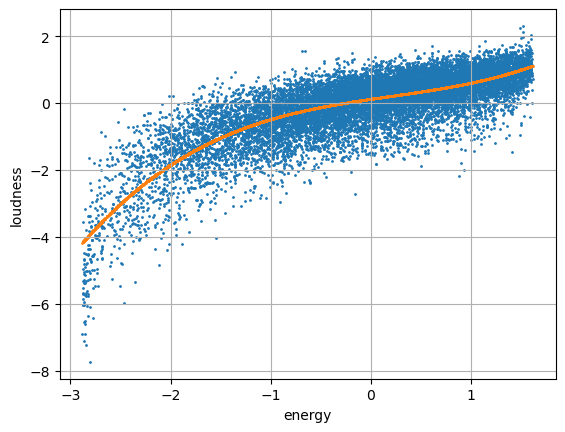

In [9]:
# Sample data
X = df['energy'].values.reshape(-1,1)
m = X.mean()
s = X.std()
X = (X - m) / s

x = df['energy'].values
m = x.mean()
s = x.std()
x = (x - m) / s

# Compute X^2 and X^3
X_squared = X ** 2
X_cubed = X ** 3

# Concatenate X, X^2, and X^3
X_extended = np.concatenate((X, X_squared, X_cubed), axis=1)

y = df['loudness'].values
m = y.mean()
s = y.std()
y = (y - m) / s

# Add a constant term to the predictor variables
X1 = sm.add_constant(X_extended)

# Fit the linear regression model
model = sm.OLS(y, X1).fit()

# Predicted values
predicted_values = model.predict(X1)

print(model.summary())

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(x, y, s=1)
plt.scatter(x, predicted_values, s=1)
plt.grid(True)
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show()

 Hypothesis Testing
 
**Null Hypothesis (H0)**: There is no relation between loudness and energy of a song, hence coeffcient values are 0.

**Alternative Hypothesis (H1)**: There is a significant relation between loudness and energy of a song.

We can see some correlation between loudness and energy, and a regression was setup between them, and a cubic polynomial was fitted. The correlation value comes out to be 0.66, decent enough to establish some relationship between them.

The point and inerval estimates can be seen in the output of the regression model.

Through the p-values generated by the model, we reject the null hypothesis.

### VISUALISATION PLOTS

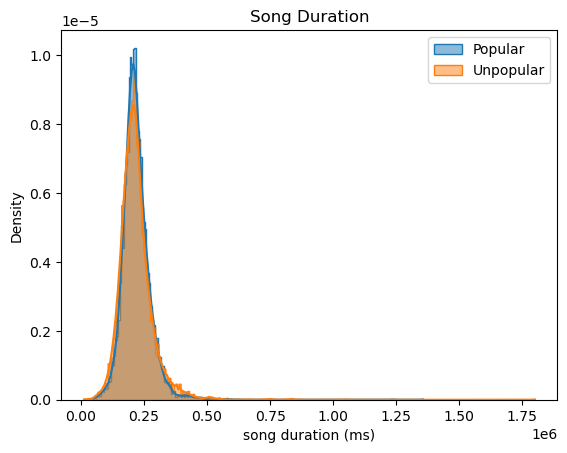

Mean Song Durations
Popular songs:  219236.0796336344
Unpopular songs:  218630.8035385704


In [10]:
# SONG DURATION

dur_pop = df[df['song_popularity'] > 50]['song_duration_ms']
dur_unpop = df[df['song_popularity'] <= 50]['song_duration_ms']


sns.histplot(dur_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(dur_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('song duration (ms)')
plt.ylabel('Density')
plt.title('Song Duration')
plt.show()

print('Mean Song Durations')
print('Popular songs: ', dur_pop.mean())
print('Unpopular songs: ', dur_unpop.mean())

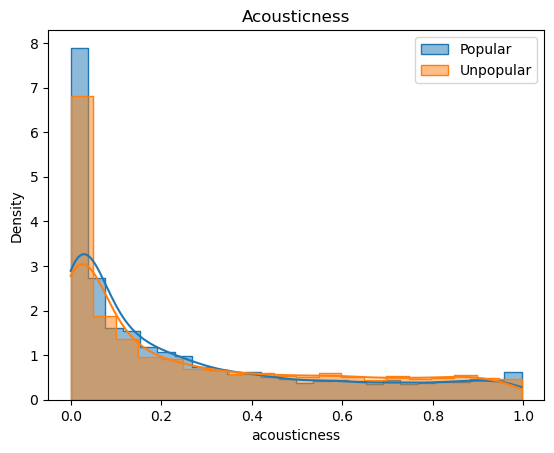

Acousticness
Popular songs:  0.25996706724208113
Unpopular songs:  0.28211930888322717


In [11]:
# ACOUSTICNESS

ac_pop = df[df['song_popularity'] > 50]['acousticness']
ac_unpop = df[df['song_popularity'] <= 50]['acousticness']

sns.histplot(ac_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(ac_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('acousticness')
plt.ylabel('Density')
plt.title('Acousticness')
plt.show()

print('Acousticness')
print('Popular songs: ', ac_pop.mean())
print('Unpopular songs: ',ac_unpop.mean())

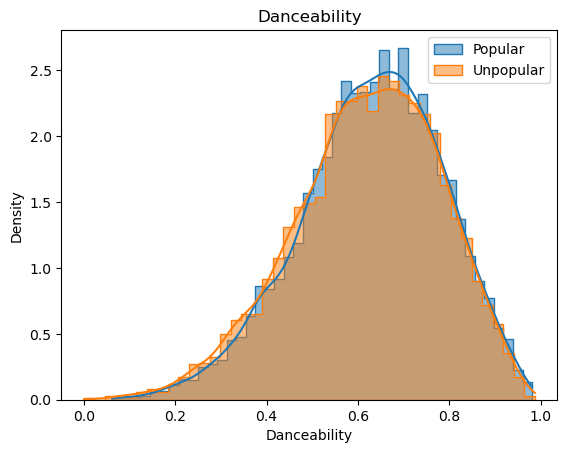

Danceability
Popular songs:  0.6292988042233812
Unpopular songs:  0.6191892427459307


In [12]:
# DANCEABILITY
dc_pop = df[df['song_popularity'] > 50]['danceability']
dc_unpop = df[df['song_popularity'] <= 50]['danceability']

sns.histplot(dc_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(dc_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.title('Danceability')
plt.show()

print('Danceability')
print('Popular songs: ', dc_pop.mean())
print('Unpopular songs: ', dc_unpop.mean())

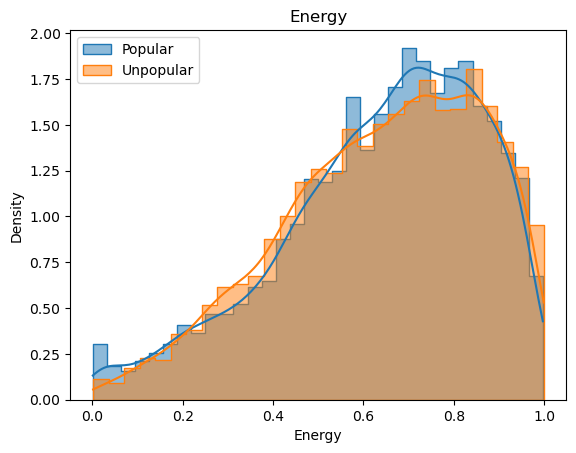

Energy
Popular songs:  0.6389331586312175
Unpopular songs:  0.6406853517338996


In [13]:
# ENERGY
en_pop = df[df['song_popularity'] > 50]['energy']
en_unpop = df[df['song_popularity'] <= 50]['energy']

sns.histplot(en_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(en_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Density')
plt.title('Energy')
plt.show()

print('Energy')
print('Popular songs: ', en_pop.mean())
print('Unpopular songs: ', en_unpop.mean())

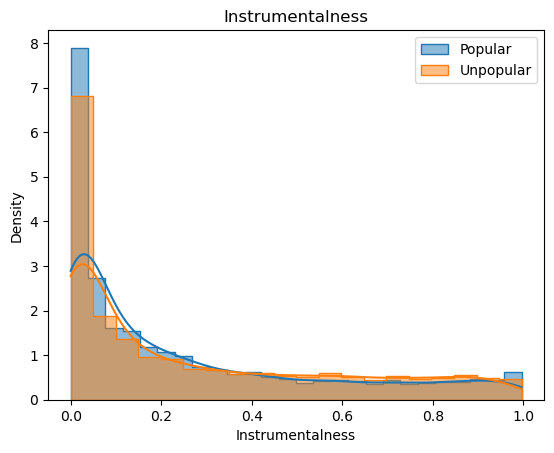

Instrumentalness
Popular songs:  0.25996706724208113
Unpopular songs:  0.28211930888322717


In [14]:
# INSTRUMENTALNESS

in_pop = df[df['song_popularity'] > 50]['acousticness']
in_unpop = df[df['song_popularity'] <= 50]['acousticness']

sns.histplot(in_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(in_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('Instrumentalness')
plt.ylabel('Density')
plt.title('Instrumentalness')
plt.show()

print('Instrumentalness')
print('Popular songs: ', in_pop.mean())
print('Unpopular songs: ', in_unpop.mean())

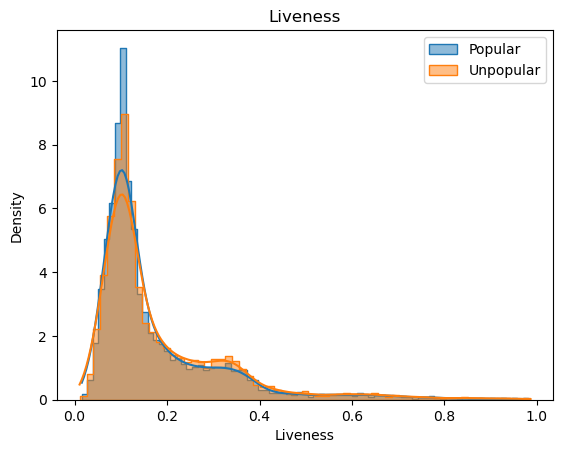

Liveness
Popular songs:  0.1754434550311665
Unpopular songs:  0.1859887898089172


In [15]:
# LIVENESS

li_pop = df[df['song_popularity'] > 50]['liveness']
li_unpop = df[df['song_popularity'] <= 50]['liveness']

sns.histplot(li_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(li_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('Liveness')
plt.ylabel('Density')
plt.title('Liveness')
plt.show()

print('Liveness')
print('Popular songs: ', li_pop.mean())
print('Unpopular songs: ', li_unpop.mean())

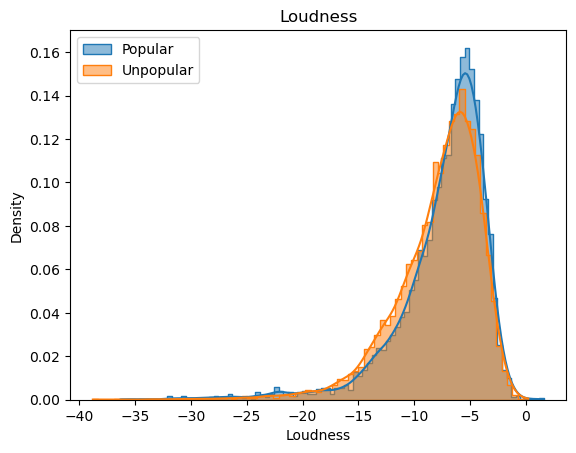

Loudness
Popular songs:  -7.480040198448036
Unpopular songs:  -7.896640056617127


In [16]:
#LOUDNESS
lo_pop = df[df['song_popularity'] > 50]['loudness']
lo_unpop = df[df['song_popularity'] <= 50]['loudness']

sns.histplot(lo_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(lo_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('Density')
plt.title('Loudness')
plt.show()

print('Loudness')
print('Popular songs: ', lo_pop.mean())
print('Unpopular songs: ', lo_unpop.mean())

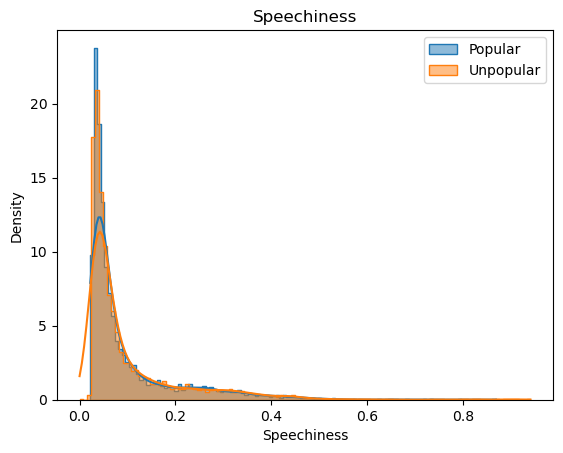

Speechiness
Popular songs:  0.09759016664546495
Unpopular songs:  0.10145347487615003


In [17]:
#SPEECHINESS

sp_pop = df[df['song_popularity'] > 50]['speechiness']
sp_unpop = df[df['song_popularity'] <= 50]['speechiness']

sns.histplot(sp_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(sp_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('Speechiness')
plt.ylabel('Density')
plt.title('Speechiness')
plt.show()

print('Speechiness')
print('Popular songs: ', sp_pop.mean())
print('Unpopular songs: ', sp_unpop.mean())

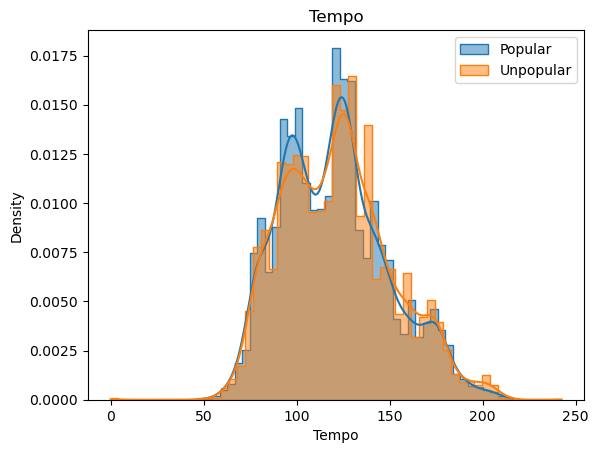

Tempo
Popular songs:  120.33332018827122
Unpopular songs:  121.96363821656051


In [18]:
#TEMPO

tp_pop = df[df['song_popularity'] > 50]['tempo']
tp_unpop = df[df['song_popularity'] <= 50]['tempo']

sns.histplot(tp_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(tp_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Density')
plt.title('Tempo')
plt.show()

print('Tempo')
print('Popular songs: ', tp_pop.mean())
print('Unpopular songs: ', tp_unpop.mean())

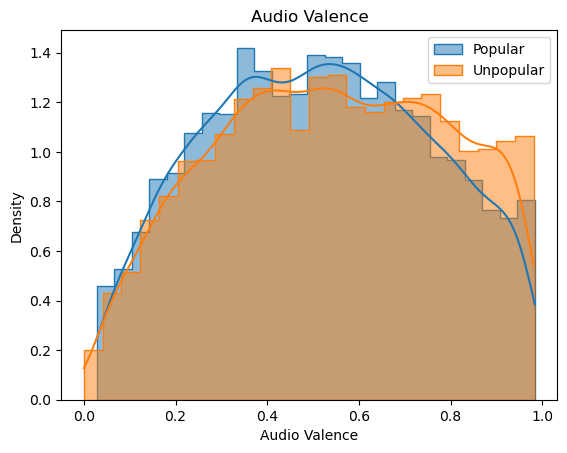

Audio Valence
Popular songs:  0.5151871517618624
Unpopular songs:  0.5400750884642604


In [19]:
#AUDIO VALENCE

av_pop = df[df['song_popularity'] > 50]['audio_valence']
av_unpop = df[df['song_popularity'] <= 50]['audio_valence']

sns.histplot(av_pop, stat='density', label='Popular', element='step', kde=True)
sns.histplot(av_unpop, stat='density', label='Unpopular', element='step', kde=True)
plt.legend()
plt.xlabel('Audio Valence')
plt.ylabel('Density')
plt.title('Audio Valence')
plt.show()

print('Audio Valence')
print('Popular songs: ', av_pop.mean())
print('Unpopular songs: ', av_unpop.mean())

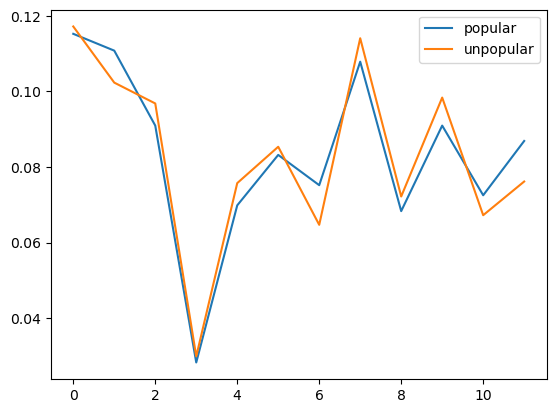

In [20]:
#KEY

key_pop = np.zeros(12)
key_unpop = np.zeros(12)

for i in range(0, 12):
    key_pop[i] = len(df[df.song_popularity > 50][df[df.song_popularity > 50].key == i]['key'])
    key_unpop[i] = len(df[df.song_popularity <= 50][df[df.song_popularity <= 50].key == i]['key'])

x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])

plt.plot(x, key_pop/len(df[df.song_popularity > 50]['key']))
plt.plot(x, key_unpop/len(df[df.song_popularity <= 50]['key']))
plt.legend(["popular", "unpopular"])

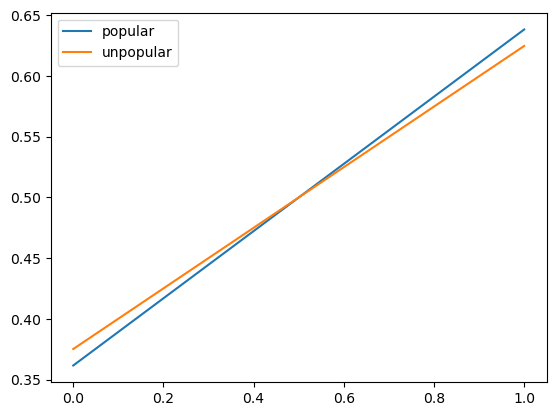

In [21]:
#AUDIO MODE

am_pop = np.zeros(2)
am_unpop = np.zeros(2)

for i in range(0, 2):
    am_pop[i] = len(df[df.song_popularity > 50][df[df.song_popularity > 50].audio_mode == i]['audio_mode'])
    am_unpop[i] = len(df[df.song_popularity <= 50][df[df.song_popularity <= 50].audio_mode == i]['audio_mode'])

x = np.array([0,1])

plt.plot(x, am_pop/len(df[df.song_popularity > 50]['audio_mode']))
plt.plot(x, am_unpop/len(df[df.song_popularity <= 50]['audio_mode']))
plt.legend(["popular", "unpopular"])
plt.show()

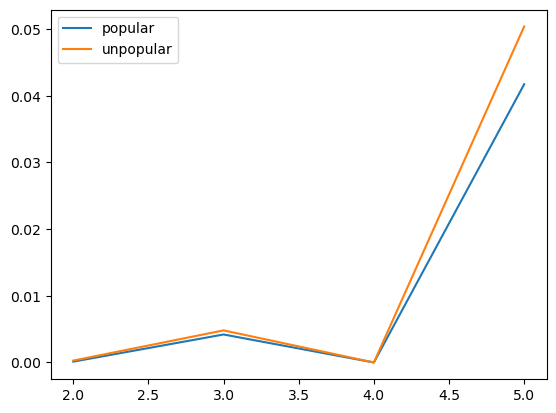

In [22]:
# Time Signature

ts_pop = np.zeros(4)
ts_unpop = np.zeros(4)

for i in range(0, 4):
    ts_pop[i] = len(df[df.song_popularity > 50][df[df.song_popularity > 50].time_signature == i]['time_signature'])
    ts_unpop[i] = len(df[df.song_popularity <= 50][df[df.song_popularity <= 50].time_signature == i]['time_signature'])

x = np.array([2,3,4,5])

plt.plot(x, ts_pop/len(df[df.song_popularity > 50]['time_signature']))
plt.plot(x, ts_unpop/len(df[df.song_popularity <= 50]['time_signature']))
plt.legend(["popular", "unpopular"])
plt.show()

### Observation

As we can observe from the above plots, where each histogram plot corresponds to a single parameter and the distribution is compared for songs that are popular and non popular. In case there would be differences in distributions, we could have concluded that there lies a correlation between song popularity and the parameter. But in our case, we found that for all of the parameters under consideration,the distributions of popular and unpopular songs are nearly identical.
Moreover, observing the correlation coefficients obtained in the heatmap between song popularity and other parameters, we found that the vaue of the coefficient lies between 0 to 0.1 which indicates poor correlation.
Therefore, we conclude from these observations that we cannot use these parameters to predict song popularity as there does not exist a clear correlation.

In [ ]:
abc = df.drop('song_name', axis=1)
sns.pairplot(abc)

### Fitting an MLR model for predicting the song popularity

In [ ]:
# Sample data

# Separate numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Function to perform z-score normalization
def z_score_normalize(df, cols):
    return (df[cols] - df[cols].mean()) / df[cols].std()

# Apply z-score normalization to numerical columns
normalized_df = df.copy()
normalized_df[numerical_cols] = z_score_normalize(df, numerical_cols)

X = df.iloc[:, 2:15].values

y = df.iloc[:, 1].values
m = y.mean()
s = y.std()
y = (y - m) / s
# Add a constant term to the predictor variables
X1 = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X1).fit()

# Output the summary of the regression model
print(model.summary())

# Output the p-value of the coefficient for the predictor variable
print("P-value:", "{:.2e}".format(model.pvalues[1]))  # Change the index as needed for specific predictor variables

As can be seen above, the p-values for some variables is too high. Also the R^2 value is too low, Indicating that the popularity of the somg cannot be predicted through these features.

### Conclusion

- We cannot predict the popularity of the song with these parameters
- Also through the analysis of the variables. no correlation is obtained
- However we can predict for a given song, we can correlate the energy or loudness, vice versa.
- A firm conclusion can be made that there is surely no linear relationship among most of the variables.
- We also read an article stating that it is truly unpredictable, you can view it <a href="https://towardsdatascience.com/song-popularity-predictor-1ef69735e380">here</a>
- Humans are really unpredictable !
